In [268]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.stats import pearsonr, spearmanr



# Load data

In [269]:
df=pd.read_csv("./movies_metadata.csv")
df.head()

C:\Users\anuso\AppData\Local\Temp\ipykernel_12796\1461538378.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Exploratory Data Analysis (EDA)

In [270]:
print("ข้อมูลเบื้องต้น:")
print(df.info())

ข้อมูลเบื้องต้น:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null

In [271]:
print("\nสถิติเชิงสรุป:")
print(df.describe(include="all"))


สถิติเชิงสรุป:
        adult                              belongs_to_collection budget  \
count   45466                                               4494  45466   
unique      5                                               1698   1226   
top     False  {'id': 415931, 'name': 'The Bowery Boys', 'pos...      0   
freq    45454                                                 29  36573   
mean      NaN                                                NaN    NaN   
std       NaN                                                NaN    NaN   
min       NaN                                                NaN    NaN   
25%       NaN                                                NaN    NaN   
50%       NaN                                                NaN    NaN   
75%       NaN                                                NaN    NaN   
max       NaN                                                NaN    NaN   

                               genres                     homepage      id  \
count

In [272]:
# ตรวจสอบค่าที่หายไป
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# ตรวจสอบค่าซ้ำกัน
print("\nจำนวนค่าซ้ำกัน:", df.duplicated().sum())


Missing Values:
belongs_to_collection    40972
homepage                 37684
imdb_id                     17
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

จำนวนค่าซ้ำกัน: 13


# Data Cleaning

In [273]:
df = df.dropna(subset=['release_date','revenue','genres'])
df = df[df['revenue'] > 0]
df = df[['release_date','revenue','genres','vote_count','runtime','budget','vote_average']]
df = df.drop_duplicates()
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df = df[df['budget']>0]
df['runtime'].fillna(df['runtime'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   release_date  5377 non-null   object 
 1   revenue       5377 non-null   float64
 2   genres        5377 non-null   object 
 3   vote_count    5377 non-null   float64
 4   runtime       5377 non-null   float64
 5   budget        5377 non-null   int64  
 6   vote_average  5377 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 336.1+ KB


In [274]:
df.head()

,release_date,revenue,genres,vote_count,runtime,budget,vote_average
0,1995-10-30,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",5415.0,81.0,30000000,7.7
1,1995-12-15,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2413.0,104.0,65000000,6.9
3,1995-12-22,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",34.0,127.0,16000000,6.1
5,1995-12-15,187436818.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1886.0,170.0,60000000,7.7
8,1995-12-22,64350171.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",174.0,106.0,35000000,5.5


In [275]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year
df.head()

,release_date,revenue,genres,vote_count,runtime,budget,vote_average,release_month,release_year
0,1995-10-30,373554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",5415.0,81.0,30000000,7.7,10,1995
1,1995-12-15,262797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2413.0,104.0,65000000,6.9,12,1995
3,1995-12-22,81452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",34.0,127.0,16000000,6.1,12,1995
5,1995-12-15,187436818.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",1886.0,170.0,60000000,7.7,12,1995
8,1995-12-22,64350171.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",174.0,106.0,35000000,5.5,12,1995


In [276]:
df.genres = df.genres.apply(eval).apply(lambda x: [genre['name'] for genre in x] if x else pd.NA)
df.genres.info()

<class 'pandas.core.series.Series'>
Int64Index: 5377 entries, 0 to 45422
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
5365 non-null   object
dtypes: object(1)
memory usage: 84.0+ KB


In [277]:
df['genres'] = df['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['genres']

0            Animation Comedy Family
1           Adventure Fantasy Family
3               Comedy Drama Romance
5        Action Crime Drama Thriller
8          Action Adventure Thriller
                    ...             
45250            Action Comedy Drama
45399                   Crime Comedy
45409                   Comedy Drama
45412                  Romance Drama
45422    Action Comedy Crime Foreign
Name: genres, Length: 5377, dtype: object

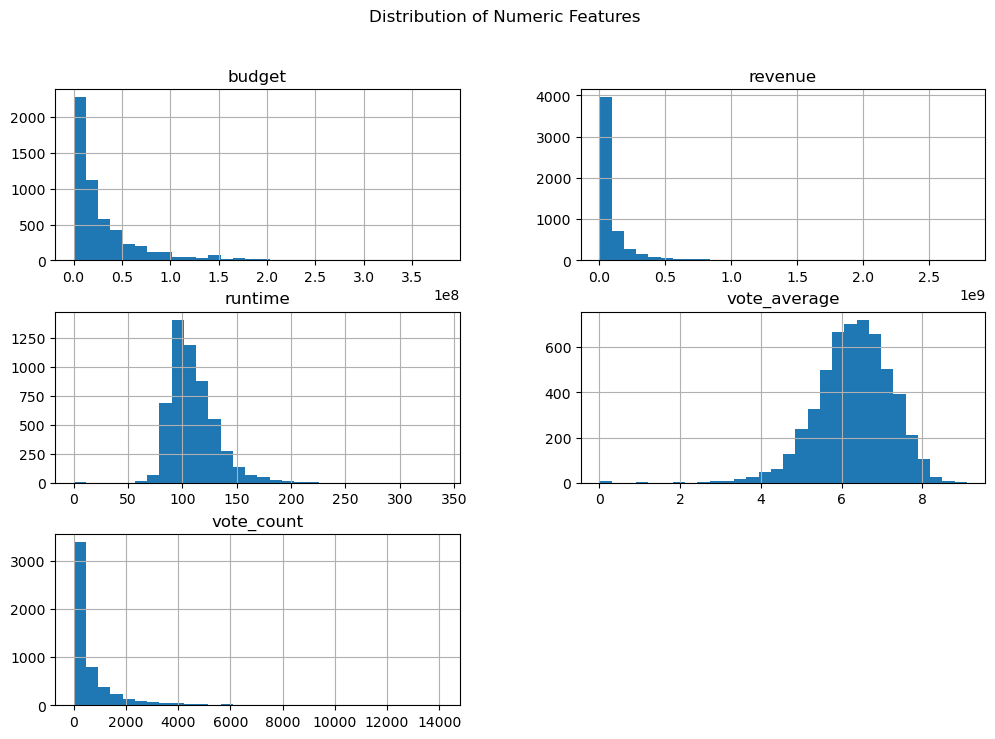

In [278]:
# การกระจายค่าของตัวเลขสำคัญ
num_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
df[num_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

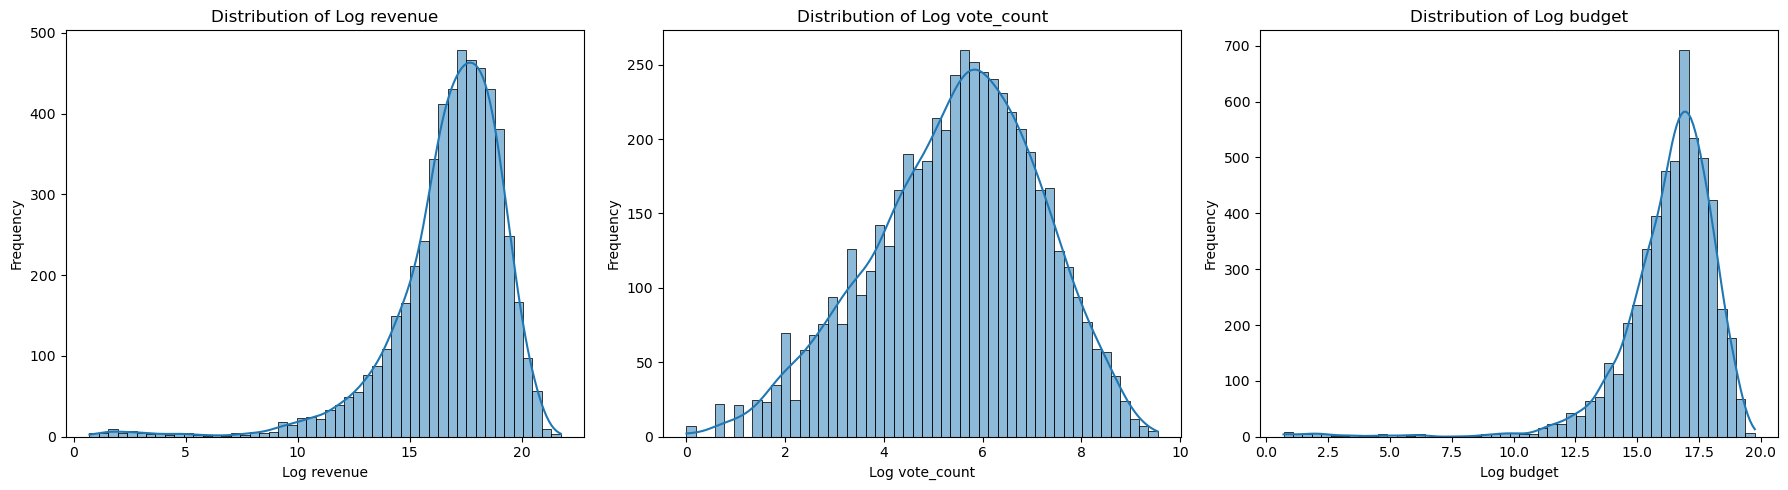

In [279]:
columns = ['revenue', 'vote_count', 'budget']

# สร้าง subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

for i, col in enumerate(columns):
    sns.histplot(np.log1p(df[col]), bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of Log {col}')
    axes[i].set_xlabel(f'Log {col}')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

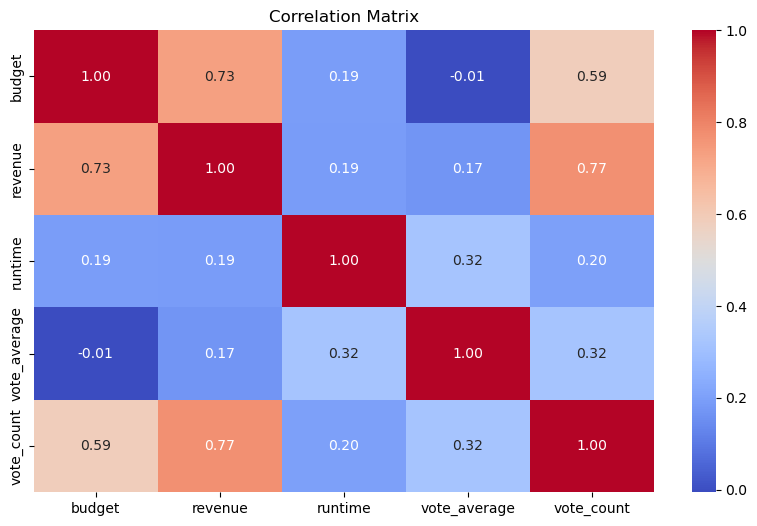

In [280]:
# ตรวจสอบความสัมพันธ์ระหว่างตัวเลข
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

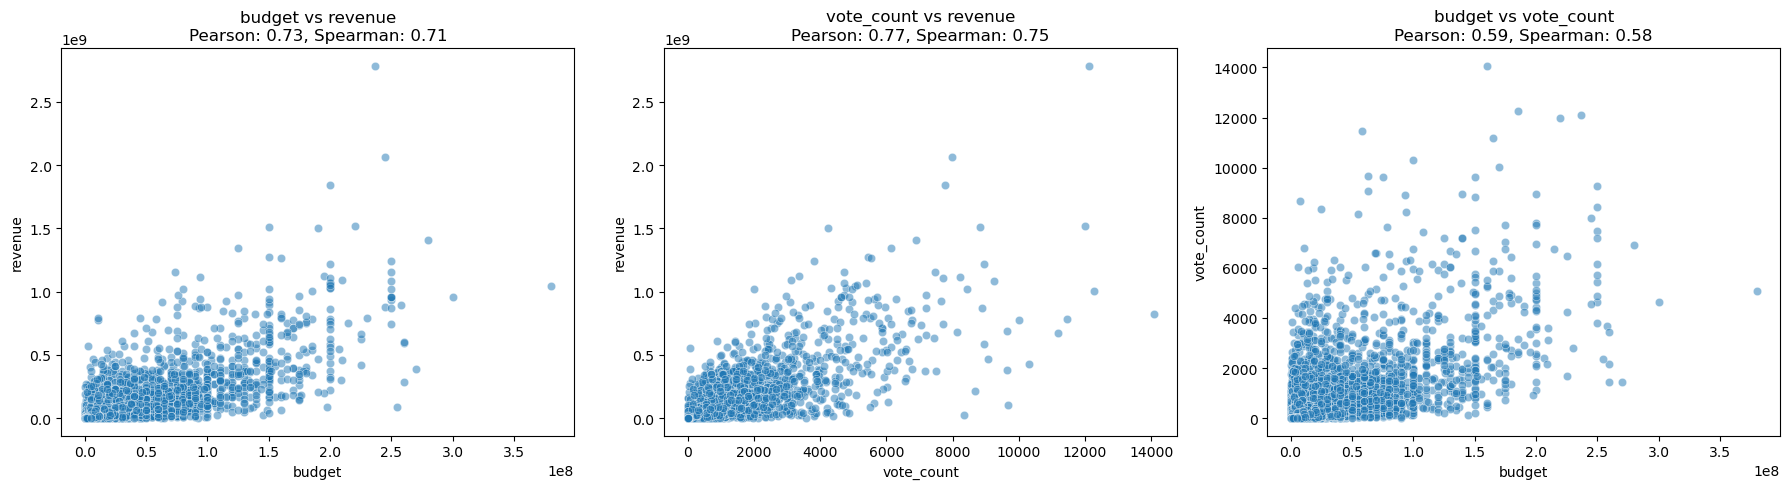

In [281]:
pairs = [('budget', 'revenue'), ('vote_count', 'revenue'), ('budget', 'vote_count')]

# สร้างกราฟ Scatter Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x, y) in enumerate(pairs):
    # คำนวณ Pearson และ Spearman correlation
    pearson_corr, _ = pearsonr(df[x], df[y])
    spearman_corr, _ = spearmanr(df[x], df[y])

    # Scatter plot
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.5)
    axes[i].set_title(f'{x} vs {y}\nPearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}')

plt.tight_layout()
plt.show()

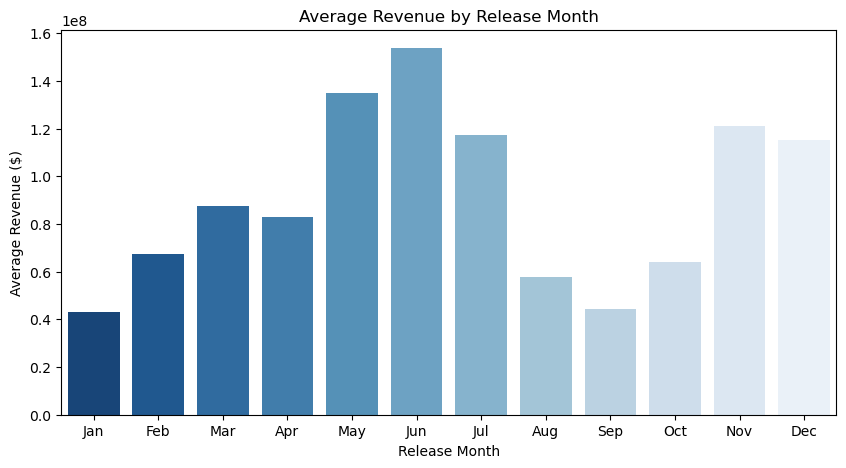

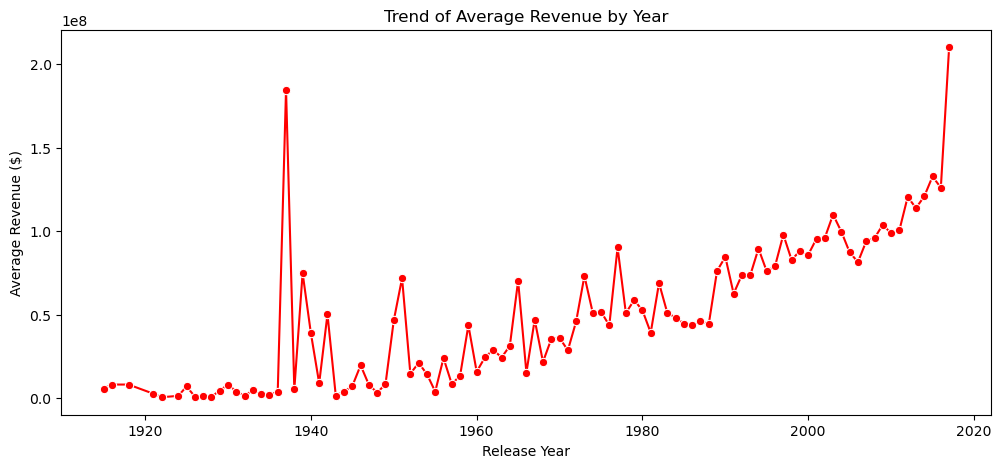

In [282]:
monthly_revenue = df.groupby('release_month')['revenue'].mean().reset_index()

# คำนวณรายได้เฉลี่ยของแต่ละปี
yearly_revenue = df.groupby('release_year')['revenue'].mean().reset_index()

# ดูแนวโน้มรายได้เฉลี่ยต่อเดือน
plt.figure(figsize=(10, 5))
sns.barplot(x='release_month', y='revenue', data=monthly_revenue, palette='Blues_r')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.show()

# ดูแนวโน้มรายได้เฉลี่ยต่อปี
plt.figure(figsize=(12, 5))
sns.lineplot(x='release_year', y='revenue', data=yearly_revenue, marker="o", color='red')
plt.title("Trend of Average Revenue by Year")
plt.xlabel("Release Year")
plt.ylabel("Average Revenue ($)")
plt.show()

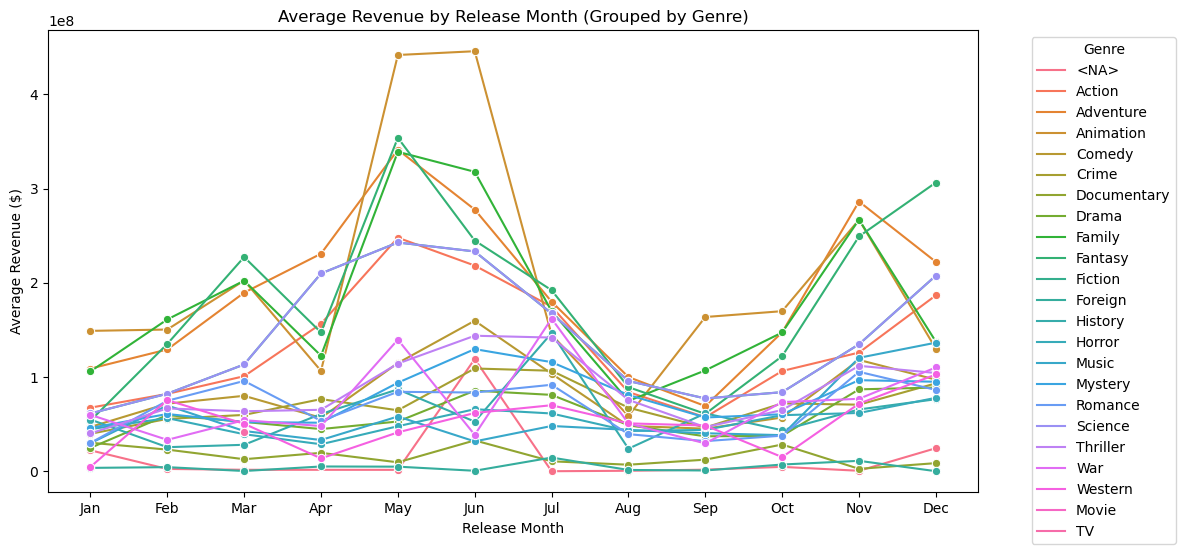

In [283]:
df['genres'] = df['genres'].str.split(' ')  # แยก genres ถ้ามีหลายแนว
df_genres = df.explode('genres')  # ขยายข้อมูลให้ 1 แนวหนังต่อ 1 แถว

# 📌 คำนวณรายได้เฉลี่ยของแต่ละเดือน ตาม Genre
genre_monthly_revenue = df_genres.groupby(['release_month', 'genres'])['revenue'].mean().reset_index()

# 📌 วาดกราฟ Line Plot ดูแนวโน้มของแต่ละแนวหนัง
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_monthly_revenue, x='release_month', y='revenue', hue='genres', marker="o")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Average Revenue by Release Month (Grouped by Genre)")
plt.xlabel("Release Month")
plt.ylabel("Average Revenue ($)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Family'),
  Text(3, 0, 'Adventure'),
  Text(4, 0, 'Fantasy'),
  Text(5, 0, 'Drama'),
  Text(6, 0, 'Romance'),
  Text(7, 0, 'Action'),
  Text(8, 0, 'Crime'),
  Text(9, 0, 'Thriller'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Science'),
  Text(12, 0, 'Fiction'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Horror'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Foreign'),
  Text(17, 0, 'Documentary'),
  Text(18, 0, 'Western'),
  Text(19, 0, 'Music'),
  Text(20, 0, '<NA>'),
  Text(21, 0, 'TV'),
  Text(22, 0, 'Movie')])

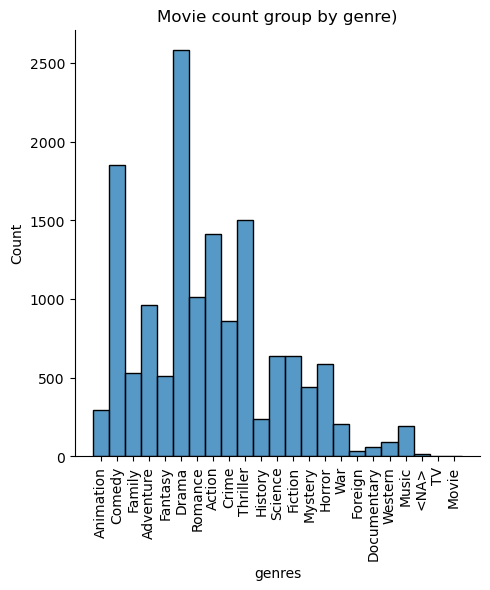

In [284]:
sns.displot(df_genres['genres'])
plt.title("Movie count group by genre)")
plt.xticks(rotation=90)

# Hypothesis testing
H0(Null Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 เท่ากับรายได้เฉลี่ยของหนังทั้งปี

H1(Alternative Hypothesis): รายได้เฉลี่ยของหนังที่ฉายในไตรมาส 2 สูงกว่า รายได้เฉลี่ยของหนังทั้งปี 20 %

In [285]:
df_q2=df[(df['release_month']>=4) & (df['release_month']<=6)]
df_all=df
mean_q2=df_q2['revenue'].mean()
mean_y=df['revenue'].mean()

percentage_increase = (mean_q2 - mean_y) * 100 / mean_y

print(f'รายได้เฉลี่ยของไตรมาสที่ 2 คือ {mean_q2:.2f}')
print(f'รายได้เฉลี่ยของทั้งปีคือ {mean_y:.2f}')
print(f'รายได้เฉลี่ยของไตรมาสที่ 2 มากกว่ารายได้เฉลี่ยทั้งปีคิดเป็น {percentage_increase:.2f}%')


รายได้เฉลี่ยของไตรมาสที่ 2 คือ 125351596.40
รายได้เฉลี่ยของทั้งปีคือ 90378137.61
รายได้เฉลี่ยของไตรมาสที่ 2 มากกว่ารายได้เฉลี่ยทั้งปีคิดเป็น 38.70%


In [286]:
std_q2=df_q2['revenue'].std()
std_y=df['revenue'].std()


In [287]:
nq2=len(df_q2)
ny=len(df['revenue'])
nq2,ny

(1272, 5377)

In [288]:
res = []
for _ in range(10000):
    gA = df_all.sample(len(df_q2['revenue'])).revenue
    gB = df_all.revenue
    res.append(gA.mean()-gB.mean())

In [289]:
expected_mean_q2 = 1.25 * mean_y
diff=mean_q2-expected_mean_q2
resample_diff=pd.Series(res)
p_value=sum(resample_diff>=diff)/len(resample_diff)
p_value

0.0013

In [290]:
alpha = 0.05  # กำหนดระดับนัยสำคัญที่ 5%
if p_value < alpha:
    print("มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 25%")
else:
    print("ไม่มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 25%")

มีหลักฐานเพียงพอที่จะสรุปว่ารายได้เฉลี่ยของไตรมาส 2 สูงกว่าทั้งปี 25%


In [291]:

# ระดับความเชื่อมั่น (เช่น 95%)
confidence_level = 0.95

# คำนวณ t-value สำหรับระดับความเชื่อมั่นที่กำหนด
alpha = 1 - confidence_level
dof_q2 = nq2 - 1  # degree of freedom สำหรับไตรมาส 2
df_year = ny - 1  # degree of freedom สำหรับทั้งปี
t_critical_q2 = stats.t.ppf(1 - alpha/2, dof_q2)
t_critical_year = stats.t.ppf(1 - alpha/2, df_year)

# คำนวณ Confidence Interval สำหรับไตรมาส 2
margin_of_error_q2 = t_critical_q2 * (std_q2 / math.sqrt(nq2))
CI_q2_lower = mean_q2 - margin_of_error_q2
CI_q2_upper = mean_q2 + margin_of_error_q2

# คำนวณ Confidence Interval สำหรับทั้งปี
margin_of_error_year = t_critical_year * (std_y / math.sqrt(ny))
CI_year_lower = mean_y - margin_of_error_year
CI_year_upper = mean_y + margin_of_error_year

# แสดงผลลัพธ์
print(f"Confidence Interval สำหรับไตรมาส 2: ({CI_q2_lower:.2f}, {CI_q2_upper:.2f})")
print(f"Confidence Interval สำหรับทั้งปี: ({CI_year_lower:.2f}, {CI_year_upper:.2f})")


Confidence Interval สำหรับไตรมาส 2: (113384497.92, 137318694.89)
Confidence Interval สำหรับทั้งปี: (85935117.27, 94821157.95)


       genres       revenue
3   Animation  3.948558e+08
2   Adventure  2.855176e+08
8      Family  2.795533e+08
9     Fantasy  2.534039e+08
10    Fiction  2.296925e+08
17    Science  2.296925e+08
1      Action  2.079468e+08
4      Comedy  1.137971e+08
18   Thriller  1.072082e+08
15    Mystery  8.701793e+07


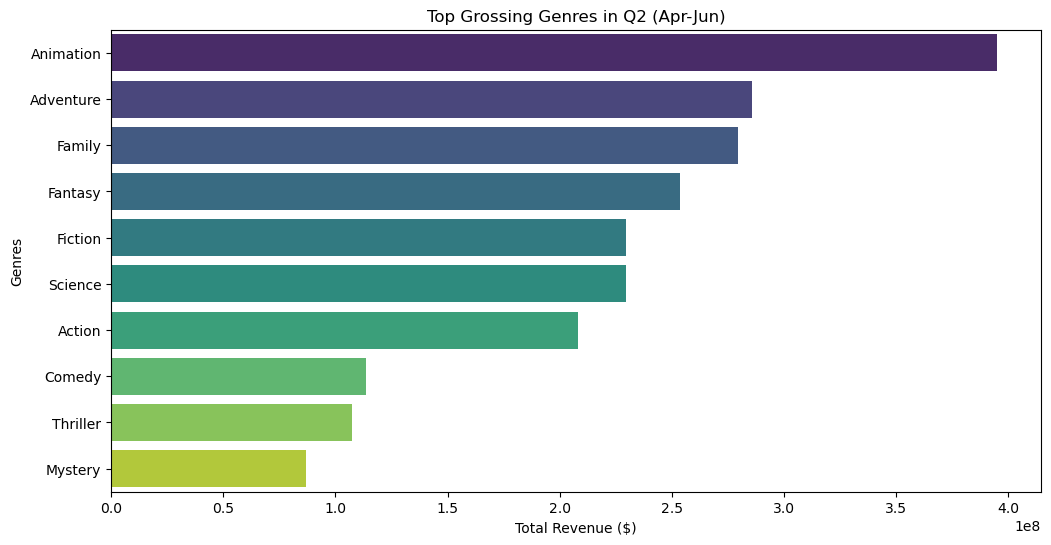

In [292]:
q2=df_genres[(df_genres['release_month']>=4) & (df['release_month']<=6)]
genre_revenue_q2 = q2.groupby('genres')['revenue'].mean().reset_index()

# 📌 จัดอันดับแนวหนังที่ทำรายได้สูงสุด
genre_revenue_q2 = genre_revenue_q2.sort_values(by='revenue', ascending=False)

# 📌 แสดง 10 อันดับแนวหนังที่ทำรายได้สูงสุดในไตรมาส 2
print(genre_revenue_q2.head(10))

# 📌 Plot: Bar chart แสดงแนวหนังที่ทำรายได้สูงสุดใน Q2
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_revenue_q2.head(10), x='revenue', y='genres', palette='viridis')
plt.title("Top Grossing Genres in Q2 (Apr-Jun)")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Genres")
plt.show()